# Семинар 2

## План ноутбука

1. Высокоуровневое API для обучение нейросетей в `PyTorch`
2. Обучение первой нейросети в `PyTorch`

## Высокоуровневое API для обучение нейросетей в `PyTorch`

In [1]:
import torch
import torch.nn as nn

### Создание объекта нейросети

In [ ]:
*args
[]
()

In [ ]:
W x + b

in_features -> out_features

In [2]:
net = nn.Sequential(
    nn.Linear(700, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

In [3]:
net

Sequential(
  (0): Linear(in_features=700, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=10, bias=True)
)

In [7]:
net[0]

Linear(in_features=700, out_features=500, bias=True)

In [4]:
x = torch.rand(1, 700)

net(x)

tensor([[-0.0046, -0.0833,  0.0331, -0.0429, -0.0125, -0.0082,  0.0663, -0.0318,
         -0.0565,  0.0647]], grad_fn=<AddmmBackward0>)

In [5]:
from collections import OrderedDict

net = nn.Sequential(
    OrderedDict(
        [
            ('linear1', nn.Linear(700, 500)),
            ('relu1', nn.ReLU()),
            ('linear2', nn.Linear(500, 200)),
            ('relu2', nn.ReLU()),
            ('linear3', nn.Linear(200, 10))
        ]
    )
)

In [6]:
net

Sequential(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=500, out_features=200, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=200, out_features=10, bias=True)
)

In [8]:
net.linear1

Linear(in_features=700, out_features=500, bias=True)

In [9]:
input_tensor = torch.rand(6, 700)

net(input_tensor).shape

torch.Size([6, 10])

In [28]:
# необходимо отнаследоваться от nn.Module и определить методы __init__ и forward

class CustomTaskNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear1 = nn.Linear(700, 500)
        self.linear2 = nn.Linear(500, 500)
        self.linear3 = nn.Linear(500, 10)

        self.activation = nn.ReLU()

    def forward(self, x):
        output = self.activation(self.linear1(x))
        output = self.activation(self.linear2(output))
        output = self.activation(self.linear2(output))
        output = self.linear3(output)

        return output

In [29]:
net = CustomTaskNetwork()

In [33]:
net.load_state_dict(torch.load("model.pt"))

<All keys matched successfully>

In [13]:
net(input_tensor).shape

torch.Size([6, 10])

In [14]:
net.to(torch.device('cuda:0'))

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (activation): ReLU()
)

In [15]:
net.linear1.weight.device

device(type='cuda', index=0)

In [16]:
net(input_tensor).shape

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [17]:
net(input_tensor.cuda()).shape

torch.Size([6, 10])

In [18]:
net.cpu()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (activation): ReLU()
)

In [19]:
net.train()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (activation): ReLU()
)

In [20]:
net.training

True

In [21]:
net.eval()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (activation): ReLU()
)

In [22]:
net.training

False

In [23]:
net.linear1.weight

Parameter containing:
tensor([[ 0.0289,  0.0207, -0.0158,  ...,  0.0181,  0.0082,  0.0071],
        [-0.0277,  0.0350,  0.0145,  ..., -0.0131,  0.0354, -0.0099],
        [ 0.0182,  0.0227, -0.0094,  ...,  0.0338, -0.0040, -0.0336],
        ...,
        [ 0.0134, -0.0242,  0.0159,  ...,  0.0244,  0.0152, -0.0095],
        [ 0.0265,  0.0196, -0.0347,  ..., -0.0337, -0.0344,  0.0017],
        [ 0.0112, -0.0045,  0.0262,  ...,  0.0193, -0.0022,  0.0070]],
       requires_grad=True)

In [24]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0289,  0.0207, -0.0158,  ...,  0.0181,  0.0082,  0.0071],
         [-0.0277,  0.0350,  0.0145,  ..., -0.0131,  0.0354, -0.0099],
         [ 0.0182,  0.0227, -0.0094,  ...,  0.0338, -0.0040, -0.0336],
         ...,
         [ 0.0134, -0.0242,  0.0159,  ...,  0.0244,  0.0152, -0.0095],
         [ 0.0265,  0.0196, -0.0347,  ..., -0.0337, -0.0344,  0.0017],
         [ 0.0112, -0.0045,  0.0262,  ...,  0.0193, -0.0022,  0.0070]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0241, -0.0367,  0.0284, -0.0128, -0.0097, -0.0328, -0.0102, -0.0323,
          0.0149, -0.0077, -0.0029, -0.0067,  0.0203,  0.0337, -0.0155, -0.0093,
         -0.0233,  0.0117,  0.0314, -0.0334,  0.0309,  0.0317,  0.0023,  0.0058,
          0.0257,  0.0281, -0.0123,  0.0087,  0.0104,  0.0271, -0.0232,  0.0362,
         -0.0047,  0.0171, -0.0191, -0.0034, -0.0196, -0.0101, -0.0352,  0.0341,
          0.0002, -0.0091,  0.0343, -0.0256, -0.0141, -0.0351, -0.0359, -0.0288

In [25]:
net.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.0289,  0.0207, -0.0158,  ...,  0.0181,  0.0082,  0.0071],
                      [-0.0277,  0.0350,  0.0145,  ..., -0.0131,  0.0354, -0.0099],
                      [ 0.0182,  0.0227, -0.0094,  ...,  0.0338, -0.0040, -0.0336],
                      ...,
                      [ 0.0134, -0.0242,  0.0159,  ...,  0.0244,  0.0152, -0.0095],
                      [ 0.0265,  0.0196, -0.0347,  ..., -0.0337, -0.0344,  0.0017],
                      [ 0.0112, -0.0045,  0.0262,  ...,  0.0193, -0.0022,  0.0070]])),
             ('linear1.bias',
              tensor([ 0.0241, -0.0367,  0.0284, -0.0128, -0.0097, -0.0328, -0.0102, -0.0323,
                       0.0149, -0.0077, -0.0029, -0.0067,  0.0203,  0.0337, -0.0155, -0.0093,
                      -0.0233,  0.0117,  0.0314, -0.0334,  0.0309,  0.0317,  0.0023,  0.0058,
                       0.0257,  0.0281, -0.0123,  0.0087,  0.0104,  0.0271, -0.0232,  0.0362,
                      -0.004

In [26]:
torch.save(net.state_dict(), 'model.pt')

In [27]:
torch.load('model.pt')

OrderedDict([('linear1.weight',
              tensor([[ 0.0289,  0.0207, -0.0158,  ...,  0.0181,  0.0082,  0.0071],
                      [-0.0277,  0.0350,  0.0145,  ..., -0.0131,  0.0354, -0.0099],
                      [ 0.0182,  0.0227, -0.0094,  ...,  0.0338, -0.0040, -0.0336],
                      ...,
                      [ 0.0134, -0.0242,  0.0159,  ...,  0.0244,  0.0152, -0.0095],
                      [ 0.0265,  0.0196, -0.0347,  ..., -0.0337, -0.0344,  0.0017],
                      [ 0.0112, -0.0045,  0.0262,  ...,  0.0193, -0.0022,  0.0070]])),
             ('linear1.bias',
              tensor([ 0.0241, -0.0367,  0.0284, -0.0128, -0.0097, -0.0328, -0.0102, -0.0323,
                       0.0149, -0.0077, -0.0029, -0.0067,  0.0203,  0.0337, -0.0155, -0.0093,
                      -0.0233,  0.0117,  0.0314, -0.0334,  0.0309,  0.0317,  0.0023,  0.0058,
                       0.0257,  0.0281, -0.0123,  0.0087,  0.0104,  0.0271, -0.0232,  0.0362,
                      -0.004

In [ ]:
net.load_state_dict(torch.load('model.pt'))

In [34]:
torch.save(torch.rand(100, 100), "tensor.pt")

In [35]:
! ls -la

total 2520
drwxrwxr-x 3 1000 1000    4096 Oct  9 12:07 .
drwxrwxr-x 6 1000 1000    4096 Oct  8 15:15 ..
drwxr-xr-x 2 root root    4096 Oct  8 13:52 .ipynb_checkpoints
-rw-rw-r-- 1 1000 1000   93688 Oct  9 12:06 Seminar_2_Intro_to_DL.ipynb
-rw-r--r-- 1 root root 2426420 Oct  9 12:03 model.pt
-rw-r--r-- 1 root root   41111 Oct  9 12:07 tensor.pt


In [36]:
torch.load("tensor.pt")

tensor([[0.1940, 0.7065, 0.8761,  ..., 0.6949, 0.0950, 0.5104],
        [0.6817, 0.6439, 0.7966,  ..., 0.2392, 0.4570, 0.2767],
        [0.1314, 0.3989, 0.3975,  ..., 0.6535, 0.0173, 0.4705],
        ...,
        [0.9745, 0.9852, 0.6879,  ..., 0.3329, 0.6604, 0.8833],
        [0.6170, 0.9011, 0.5675,  ..., 0.0451, 0.3892, 0.8162],
        [0.0395, 0.0873, 0.4839,  ..., 0.1275, 0.4015, 0.5961]])

### Оптимизаторы

In [37]:
from torch import optim

In [38]:
optim.SGD, optim.Adam

(torch.optim.sgd.SGD, torch.optim.adam.Adam)

In [41]:
optimizer = optim.Adam(net.parameters(), betas=(0.9, 0.999), lr=1e-3)

In [ ]:
for param in parameters:
    param = param - param.grad * self.lr

In [42]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [43]:
optimizer = optim.SGD(
    [
        {'params': net.linear1.parameters()},
        {'params': net.linear2.parameters(), 'lr': 1e-3}
    ],
    lr=1e-2,
    momentum=0.9
)

In [44]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [45]:
optimizer.step()

In [46]:
optimizer.zero_grad(set_to_none=True)

### Функции потерь

In [47]:
nn.L1Loss, nn.MSELoss, nn.CrossEntropyLoss, nn.NLLLoss

(torch.nn.modules.loss.L1Loss,
 torch.nn.modules.loss.MSELoss,
 torch.nn.modules.loss.CrossEntropyLoss,
 torch.nn.modules.loss.NLLLoss)

In [48]:
loss = nn.MSELoss()

In [49]:
loss

MSELoss()

In [50]:
x = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)

output = loss(x, target)

print(output)

output.backward()

tensor(2.7448, grad_fn=<MseLossBackward0>)


In [51]:
x.grad

tensor([[-0.1915, -0.3256, -0.3452,  0.4077, -0.0965],
        [ 0.0080, -0.2400, -0.1864, -0.0920, -0.0071],
        [-0.0399,  0.1643, -0.2740,  0.2657, -0.1392]])

In [57]:
loss = nn.CrossEntropyLoss()

x = torch.randn(3, 5, requires_grad=True)
y = torch.empty(3, dtype=torch.long).random_(5)

x, y

(tensor([[ 0.0833, -0.0875, -1.2107,  1.4702, -1.7268],
         [-0.3889, -0.3152,  0.1784, -2.0484,  1.5957],
         [-0.4154, -0.3775,  1.1265, -0.5106,  0.3695]], requires_grad=True),
 tensor([4, 0, 4]))

In [58]:
loss(x, y)

tensor(2.5241, grad_fn=<NllLossBackward0>)

### Датасеты и даталоадеры

In [59]:
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset

In [60]:
n_features = 2
n_objects = 300

torch.manual_seed(0);

In [61]:
w_true = torch.randn(n_features, 1)

X = (torch.rand(n_objects, n_features) - 0.5) * 10
X *= (torch.arange(n_features) * 2 + 1)

Y = X @ w_true
Y += torch.rand_like(Y)

w_true.shape, X.shape, Y.shape

(torch.Size([2, 1]), torch.Size([300, 2]), torch.Size([300, 1]))

In [64]:
w_true

tensor([[ 1.5410],
        [-0.2934]])

In [62]:
X

tensor([[-1.9258e+00,  4.0224e+00],
        [-9.9066e-02,  1.1893e+01],
        [-4.4372e-01,  3.9692e+00],
        [-1.5111e+00, -2.9485e+00],
        [-4.7767e+00, -9.9342e+00],
        [-2.0611e+00,  5.5565e-01],
        [ 1.9767e+00,  9.0003e+00],
        [-3.3897e+00, -6.5319e+00],
        [ 1.8161e+00,  1.2456e+01],
        [-1.0290e+00,  1.1225e+01],
        [-8.0592e-01,  1.5872e+00],
        [ 4.5274e+00, -1.3915e+01],
        [-3.1477e+00, -3.7975e+00],
        [-1.9490e+00,  1.2960e+01],
        [-3.2409e+00, -6.9050e+00],
        [-3.4932e+00, -1.4048e+01],
        [-2.9187e+00,  1.2894e+01],
        [ 2.2311e+00,  7.2701e+00],
        [ 2.6296e-01, -7.6903e+00],
        [ 8.4592e-01, -1.4005e+01],
        [-3.6128e+00, -7.7330e+00],
        [ 3.1547e+00,  8.7948e+00],
        [-2.2175e+00, -5.4124e-01],
        [ 3.1978e+00,  1.4912e+01],
        [ 1.9844e+00,  2.0264e+00],
        [ 3.3524e+00, -8.8320e+00],
        [ 9.3172e-01, -1.1630e+01],
        [-3.4654e+00, -7.748

In [63]:
Y

tensor([[ -3.8627],
        [ -3.3708],
        [ -1.0865],
        [ -1.1947],
        [ -4.1922],
        [ -2.8830],
        [  0.8570],
        [ -3.1964],
        [  0.0605],
        [ -4.5999],
        [ -1.0303],
        [ 11.9946],
        [ -2.9841],
        [ -6.2355],
        [ -2.0427],
        [ -0.6936],
        [ -8.0125],
        [  2.2778],
        [  3.2801],
        [  5.4253],
        [ -2.9406],
        [  2.4401],
        [ -2.3199],
        [  0.9696],
        [  2.5076],
        [  8.2262],
        [  5.6622],
        [ -2.4366],
        [  2.3743],
        [ -5.3473],
        [  5.4718],
        [ -0.3475],
        [  0.8549],
        [ -4.2920],
        [ -0.4953],
        [  3.5380],
        [  5.5648],
        [  4.0341],
        [-10.4317],
        [ 10.7845],
        [  2.3594],
        [  1.7250],
        [  5.7792],
        [  1.5100],
        [  3.9723],
        [ -4.3910],
        [  3.6980],
        [ -3.1804],
        [  5.2027],
        [ -2.0959],


In [68]:
w = torch.rand_like(w_true)

w

tensor([[0.8515],
        [0.4355]])

In [69]:
idx = torch.randint(low=0, high=len(X), size=(10,))

print(idx)

X[idx]

tensor([187, 129, 253, 265, 164,  94,  42, 234,  24,  46])


tensor([[ 3.5792, 11.5819],
        [ 2.6479, 11.5128],
        [-1.4386,  9.2739],
        [-3.7900, -0.0723],
        [ 4.9880,  9.5218],
        [-3.5269,  0.6690],
        [ 1.9228, -8.8846],
        [ 2.8751, -1.6891],
        [ 1.9844,  2.0264],
        [ 2.4966,  3.1395]])

In [75]:
X[idx] @ w - Y[idx]

tensor([[ 5.3130],
        [ 6.0207],
        [ 7.4817],
        [ 1.9516],
        [ 3.3851],
        [ 2.3044],
        [-8.0110],
        [-3.5445],
        [ 0.0646],
        [-0.2048]])

In [76]:
(X[idx] @ w - Y[idx])

tensor([[ 5.3130],
        [ 6.0207],
        [ 7.4817],
        [ 1.9516],
        [ 3.3851],
        [ 2.3044],
        [-8.0110],
        [-3.5445],
        [ 0.0646],
        [-0.2048]])

In [65]:
dataset = TensorDataset(X, Y)

In [66]:
dataset[7]

(tensor([-3.3897, -6.5319]), tensor([-3.1964]))

In [67]:
X[7], Y[7]

(tensor([-3.3897, -6.5319]), tensor([-3.1964]))

In [96]:
# надо отнаследоваться от Dataset и определить методы __init__, __len__ и __getitem__

class CustomDataset(Dataset):
    def __init__(self, w_true, n_features, n_objects):
        self.X = (torch.rand(n_objects, n_features) - 0.5) * 10
        self.X *= (torch.arange(n_features) * 2 + 1)

        self.Y = self.X @ w_true
        self.Y += torch.rand_like(self.Y)

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, item):
        return self.X[item], self.Y[item], "123"

In [97]:
dataset = CustomDataset(w_true, n_features, n_objects)

In [89]:
dataset[7]

(tensor([ 0.3076, 12.2098]), tensor([-2.5202]), 10)

In [90]:
dataset.X[7]

tensor([ 0.3076, 12.2098])

In [91]:
from torch.utils.data import DataLoader

In [98]:
loader = DataLoader(dataset, batch_size=16, shuffle=True, drop_last=True)

In [100]:
for x, y, z in loader:
    print(f"{x=}\t{x.shape=}")
    print(f"{y=}\t{y.shape=}")
    print(z)
    break

x=tensor([[  2.8695, -13.2385],
        [  0.4090, -12.7841],
        [ -3.5551,   8.2670],
        [  3.3531,   8.4646],
        [ -0.4941,  -0.2621],
        [  0.3434,   3.5632],
        [ -3.4938,  -4.8072],
        [  2.1194,   1.1347],
        [ -1.0365,   3.9861],
        [ -2.4309,  13.8347],
        [  4.1109,   7.1128],
        [  3.7930,  10.7865],
        [  3.3728,   1.9850],
        [  0.7799,  -2.0969],
        [  0.1077,  -9.6033],
        [  2.0626, -11.7493]])	x.shape=torch.Size([16, 2])
y=tensor([[ 8.4018],
        [ 5.0162],
        [-7.5136],
        [ 3.2830],
        [-0.6324],
        [-0.2009],
        [-3.8379],
        [ 3.5353],
        [-2.0856],
        [-7.2310],
        [ 5.0993],
        [ 3.3871],
        [ 5.2497],
        [ 2.1592],
        [ 3.7996],
        [ 7.5756]])	y.shape=torch.Size([16, 1])
('123', '123', '123', '123', '123', '123', '123', '123', '123', '123', '123', '123', '123', '123', '123', '123')


### Общая структура обучения модели

In [ ]:
model.train()

for x, y in dataloader:
    optimizer.zero_grad()

    output = model(x)

    loss = loss_fn(output, y)

    loss.backward()

    optimizer.step()

In [101]:
from tqdm import tqdm

In [105]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Optimizer


def train(model: nn.Module, data_loader: DataLoader, optimizer: Optimizer, loss_fn):
    model.train()

    total_loss = 0

    for i, (x, y) in enumerate(tqdm(data_loader)):
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        loss.backward()

        total_loss += loss.item()

        optimizer.step()

    return total_loss / len(data_loader)


In [107]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def evaluate(model: nn.Module, data_loader: DataLoader, loss_fn):
    model.eval()

    total_loss = 0

    for i, (x, y) in enumerate(tqdm(data_loader)):
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

    return total_loss / len(data_loader)


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='darkgrid')


def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')

    plt.legend()

    plt.ylabel("Loss")
    plt.xlabel("Epoch")

    plt.show()

In [109]:
from IPython.display import clear_output


def fit(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs, title):
    train_loss_history, valid_loss_history = [], []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, loss_fn)
        valid_loss = evaluate(model, valid_loader, loss_fn)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        clear_output()

        plot_stats(train_loss_history, valid_loss_history, title)

## Обучение первой нейросети в `PyTorch`

In [110]:
class CustomTaskNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x)


model = CustomTaskNetwork()

optimizer = optim.Adam(model.parameters(), lr=1e-2)

loss_fn = nn.MSELoss()

In [111]:
from torch.utils.data import random_split


dataset = TensorDataset(X, Y)

train_dataset, valid_dataset = random_split(
    dataset,
    (int(len(dataset) * 0.8), len(dataset) -  int(len(dataset) * 0.8)),
    generator=torch.Generator().manual_seed(300)
)

In [112]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False)

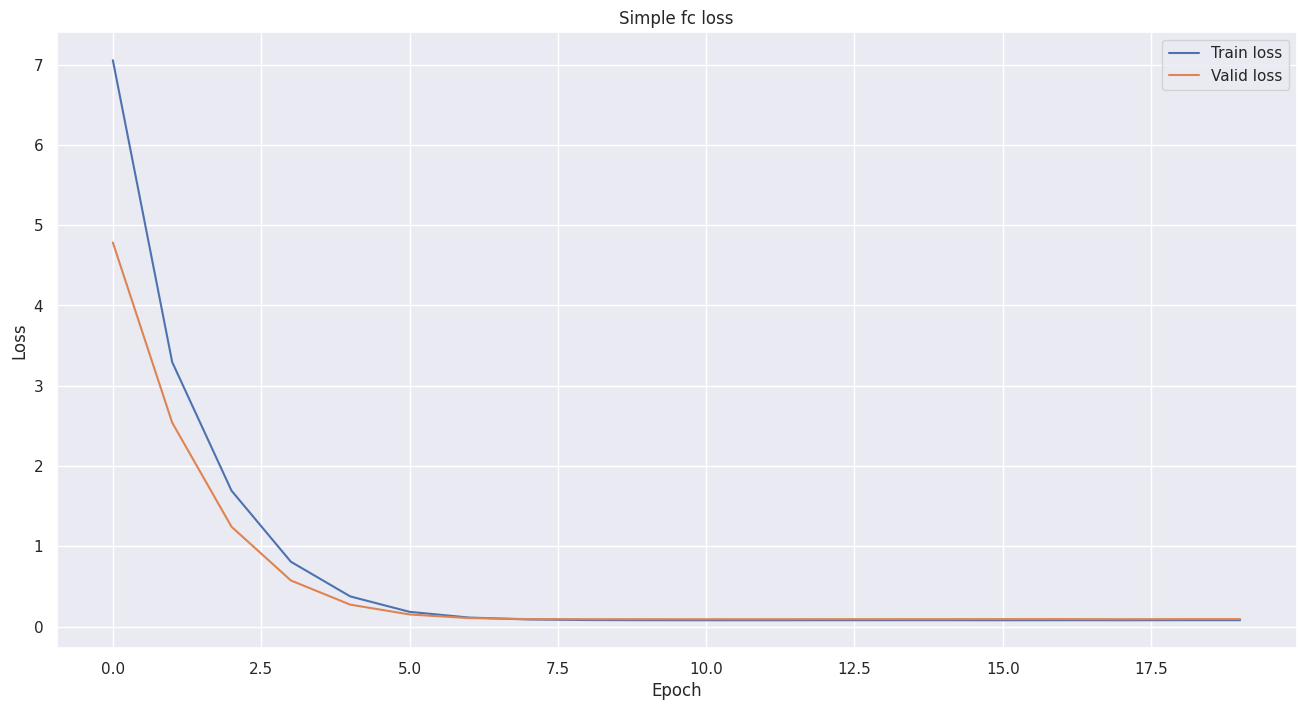

In [113]:
fit(model, train_loader, valid_loader, optimizer, loss_fn, 20, 'Simple fc')

## BatchNorm и Dropout

In [114]:
dropout = nn.Dropout(p=0.1)

dropout

Dropout(p=0.1, inplace=False)

In [115]:
x = torch.rand(3, 7)

x

tensor([[0.4857, 0.9035, 0.1018, 0.2132, 0.3809, 0.0729, 0.1050],
        [0.8425, 0.5233, 0.0978, 0.4174, 0.4836, 0.3222, 0.0818],
        [0.7721, 0.4382, 0.9882, 0.1171, 0.2255, 0.4740, 0.1518]])

In [117]:
x / 0.9

tensor([[0.5397, 1.0039, 0.1132, 0.2369, 0.4232, 0.0810, 0.1166],
        [0.9361, 0.5815, 0.1086, 0.4638, 0.5373, 0.3580, 0.0909],
        [0.8579, 0.4869, 1.0980, 0.1301, 0.2506, 0.5267, 0.1687]])

In [116]:
dropout.train()

for _ in range(3):
    print(dropout(x))

tensor([[0.5397, 1.0039, 0.1132, 0.2369, 0.4232, 0.0810, 0.1166],
        [0.9361, 0.5815, 0.1086, 0.4638, 0.5373, 0.3580, 0.0909],
        [0.8579, 0.4869, 1.0980, 0.1301, 0.2506, 0.5267, 0.1687]])
tensor([[0.0000, 1.0039, 0.1132, 0.2369, 0.4232, 0.0810, 0.1166],
        [0.9361, 0.5815, 0.1086, 0.4638, 0.5373, 0.3580, 0.0909],
        [0.8579, 0.4869, 1.0980, 0.1301, 0.2506, 0.5267, 0.1687]])
tensor([[0.5397, 1.0039, 0.1132, 0.0000, 0.4232, 0.0810, 0.1166],
        [0.9361, 0.5815, 0.1086, 0.4638, 0.5373, 0.3580, 0.0909],
        [0.8579, 0.4869, 1.0980, 0.1301, 0.0000, 0.5267, 0.0000]])


In [118]:
dropout.eval()

dropout(x)

tensor([[0.4857, 0.9035, 0.1018, 0.2132, 0.3809, 0.0729, 0.1050],
        [0.8425, 0.5233, 0.0978, 0.4174, 0.4836, 0.3222, 0.0818],
        [0.7721, 0.4382, 0.9882, 0.1171, 0.2255, 0.4740, 0.1518]])

In [129]:
batch_norm = nn.BatchNorm1d(num_features=7)

batch_norm

BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [120]:
x = torch.rand(3, 7)

x

tensor([[0.1844, 0.8558, 0.8472, 0.3011, 0.5549, 0.7383, 0.8578],
        [0.0330, 0.9978, 0.3743, 0.7037, 0.1895, 0.1152, 0.1614],
        [0.7947, 0.2534, 0.7907, 0.6512, 0.6989, 0.3888, 0.3418]])

In [121]:
batch_norm(x)

tensor([[-0.4646,  0.4755,  0.8368, -1.4038,  0.3441,  1.2712,  1.3694],
        [-0.9244,  0.9156, -1.4056,  0.8489, -1.3599, -1.1720, -0.9904],
        [ 1.3890, -1.3911,  0.5688,  0.5548,  1.0157, -0.0992, -0.3789]],
       grad_fn=<NativeBatchNormBackward0>)

In [130]:
batch_norm.weight

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1.], requires_grad=True)

In [131]:
batch_norm.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [132]:
batch_norm.running_mean

tensor([0., 0., 0., 0., 0., 0., 0.])

In [133]:
batch_norm.running_var

tensor([1., 1., 1., 1., 1., 1., 1.])

In [134]:
batch_norm.num_batches_tracked

tensor(0)

In [127]:
batch_norm(x)

batch_norm.num_batches_tracked

tensor(2)

In [135]:
batch_norm.eval()

batch_norm(x)

tensor([[0.1844, 0.8557, 0.8472, 0.3011, 0.5549, 0.7383, 0.8578],
        [0.0330, 0.9978, 0.3743, 0.7037, 0.1895, 0.1152, 0.1614],
        [0.7947, 0.2534, 0.7907, 0.6512, 0.6989, 0.3888, 0.3418]],
       grad_fn=<NativeBatchNormBackward0>)

In [136]:
x

tensor([[0.1844, 0.8558, 0.8472, 0.3011, 0.5549, 0.7383, 0.8578],
        [0.0330, 0.9978, 0.3743, 0.7037, 0.1895, 0.1152, 0.1614],
        [0.7947, 0.2534, 0.7907, 0.6512, 0.6989, 0.3888, 0.3418]])

In [ ]:
batch_norm = nn.BatchNorm1d(num_features=7)

batch_norm.eval()

batch_norm(x)